# Bayesian Linear Regression using PyMC3

$$ y = \alpha + \beta * x $$

## Bayesian Approach

$$ y \sim \mathcal{N}(\mu=\alpha + \beta * x, \sigma=\epsilon) $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

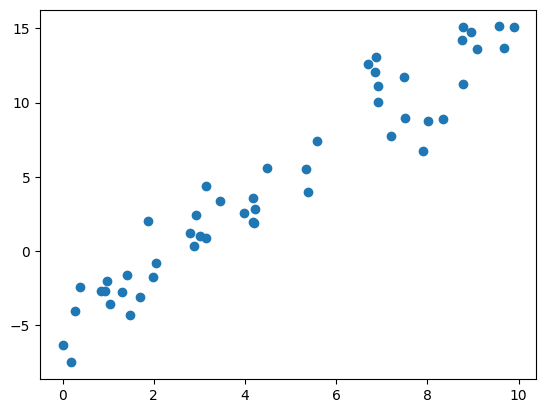

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + 2*rng.randn(50)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y)

In [4]:
import pymc3 as pm
print('Running on the PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on the PyMC3 v3.11.5


In [5]:
basic_model =  pm.Model()
with basic_model as bm:

    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Deterministics
    mu = alpha + beta * x

    # Likelihood
    Ylikelihood = pm.Normal('ylikelihood', mu=mu, sd=sigma, observed=y)


You can find the C code in this temporary file: /var/folders/zk/83r7bdpd2g11psvjbywlbxsr0000gn/T/theano_compilation_error_rrf4c5qo


Exception: ("Compilation failed (return status=1): In file included from /Users/jacktang/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.10.13-64/tmpoxg20y48/mod.cpp:1:. In file included from /Users/jacktang/miniconda3/envs/py310/include/python3.10/Python.h:25:. /usr/local/Cellar/llvm@4/4.0.1/bin/../include/c++/v1/stdio.h:108:15: fatal error: 'stdio.h' file not found. #include_next <stdio.h>.               ^~~~~~~~~. 1 error generated.. ", 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.01}))')

# Resources

* https://ostwalprasad.github.io/machine-learning/Bayesian-Linear-Regression-using-PyMC3.html
* https://twiecki.io/blog/2013/08/12/bayesian-glms-1/
* https://www.pymc.io/projects/docs/en/v3.11.4/pymc-examples/examples/generalized_linear_models/GLM-linear.html